Task 2 - Sales Forecasting Using Time Series Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
sales_data = pd.read_csv(r"C:\Users\hj\OneDrive\Desktop\Task_2\train.csv") 
print(sales_data.head())

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0


In [7]:
# Converting the 'date' column to datetime format and setting it as the index for time series analysis
sales_data['date'] = pd.to_datetime(sales_data['date'])  # Converting 'date' column to datetime format
sales_data.set_index('date', inplace=True)  # Setting 'date' as the index for time series data

# Handling missing values by replacing them with zero
sales_data.fillna(0, inplace=True)  # Replacing missing values with zero
print("\nData after filling missing values:")
print(sales_data.head())  # Displaying the first 5 rows after filling missing values

# Feature Engineering: Creating a 'day' feature based on the number of days since the earliest date
sales_data['day'] = (sales_data.index - sales_data.index.min()).days  # Creating a 'day' feature
print("\nData with the 'day' feature:")
print(sales_data.head())  # Displaying the data with the new 'day' feature



Data after filling missing values:
            id  store_nbr      family  sales  onpromotion
date                                                     
2013-01-01   0          1  AUTOMOTIVE    0.0            0
2013-01-01   1          1   BABY CARE    0.0            0
2013-01-01   2          1      BEAUTY    0.0            0
2013-01-01   3          1   BEVERAGES    0.0            0
2013-01-01   4          1       BOOKS    0.0            0

Data with the 'day' feature:
            id  store_nbr      family  sales  onpromotion  day
date                                                          
2013-01-01   0          1  AUTOMOTIVE    0.0            0    0
2013-01-01   1          1   BABY CARE    0.0            0    0
2013-01-01   2          1      BEAUTY    0.0            0    0
2013-01-01   3          1   BEVERAGES    0.0            0    0
2013-01-01   4          1       BOOKS    0.0            0    0


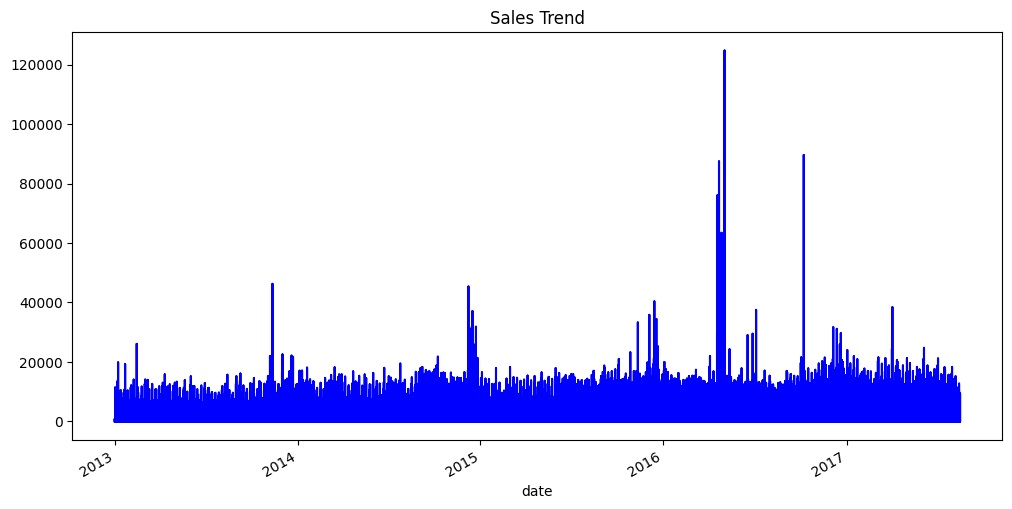

In [8]:
# Visualizing the sales data to identify any trends or patterns over time
sales_data['sales'].plot(figsize=(12, 6), title="Sales Trend", color='blue')  # Plotting the sales trend over time
plt.show()  # Displaying the plot to visually inspect the sales trend


In [9]:
# Defining the independent variable (X) as 'day' and the dependent variable (y) as 'sales'
X = sales_data['day'].values.reshape(-1, 1)  # Independent variable: 'day'
y = sales_data['sales'].values  # Dependent variable: 'sales'

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # Splitting the data into training and testing sets

# Building and training the Linear Regression model
model = LinearRegression()  # Initializing the Linear Regression model
model.fit(X_train, y_train)  # Training the model with the training data
print("\nLinear Regression Model successfully trained.")



Linear Regression Model successfully trained.


In [10]:
# Predicting the sales for the test data using the trained model
y_pred = model.predict(X_test)  # Making predictions on the test set
print("\nPredicted Sales for the test data:")
print(y_pred[:5])  # Displaying the first 5 predicted sales values



Predicted Sales for the test data:
[472.05324978 472.05324978 472.05324978 472.05324978 472.05324978]


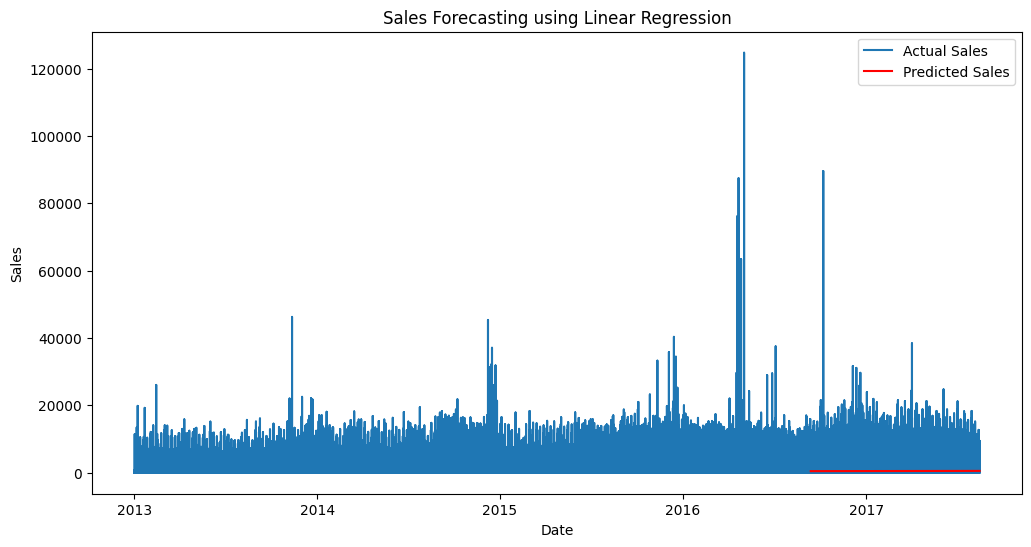

In [11]:
# Plotting the actual vs predicted sales to visually assess model performance
plt.figure(figsize=(12, 6))  # Setting the plot size
plt.plot(sales_data.index, sales_data['sales'], label="Actual Sales")  # Plotting actual sales
plt.plot(sales_data.index[-len(y_test):], y_pred, label="Predicted Sales", color='red')  # Plotting predicted sales
plt.legend()  # Adding a legend to the plot
plt.title('Sales Forecasting using Linear Regression')  # Adding a title to the plot
plt.xlabel('Date')  # Labeling the x-axis as 'Date'
plt.ylabel('Sales')  # Labeling the y-axis as 'Sales'
plt.show()  # Displaying the plot to compare actual and predicted sales


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculating model evaluation metrics: Mean Absolute Error (MAE) and Mean Squared Error (MSE)
mae = mean_absolute_error(y_test, y_pred)  # Calculating Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Calculating Mean Squared Error
print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")  # Displaying MAE
print(f"Mean Squared Error (MSE): {mse}")  # Displaying MSE



Model Evaluation Metrics:
Mean Absolute Error (MAE): 687.2190803042338
Mean Squared Error (MSE): 1854490.1965601898


In [13]:
# Based on the forecasted sales, providing business recommendations
print("\nBusiness Insights & Recommendations:")
print("1. Optimize inventory management for peak sales periods to avoid stockouts.")
print("2. Plan targeted discount offers during low sales periods to boost revenue.")
print("3. Increase promotional activities in periods with lower predicted sales to drive customer engagement.")



Business Insights & Recommendations:
1. Optimize inventory management for peak sales periods to avoid stockouts.
2. Plan targeted discount offers during low sales periods to boost revenue.
3. Increase promotional activities in periods with lower predicted sales to drive customer engagement.
